<center><font size="3"><b>Digital Signal Processing Lab </b></font></center>
<br />
<center><font size="6"><b><u>Resampling</u></b></font></center>
<br />
<br />

# Imports

In [62]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Decimation

Sometimes it is necessary to reduce the signal sampling frequency $f_s$, for example to lower the ammount of memory needed to store a file or to speed up computations. We can do that by removing the excess signal samples according to:

$$\large
    \mathbf{y}_K(n)
    =
    \mathbf{x}(nK)
$$

By doing so the sampling frequency $f_{s_K}$ of the decimated signal $\mathbf{y}_K$ is equal to $\large \frac{f_s}{K}$.

## Task

Complete the function below. It should perform the decimation operation on a signal `x`, sampled at timestamps `t`. Besides of implementing the above formula, it should also bo able to return new timestamps `t_K`, at which the decimated signal `y_K` is sampled.

In [63]:
def decimate(x, K, t=None):
    """
    This function decimates a given signal K-times.
    It also returns new timestamps if they were given.
    
    Parameters:
        x - Vector to decimate.
        t - Timestamps.
        K - Decimation factor. It should be an integer.
    
    Returns:
        y_K - Decimated signal.
        t_K - New timestamps.
    """
    
    "Your code goes below here."
    

    y_K = x[::K]
    
    if t is None:
        return y_K
    else:
        t_K = t[::K]
    return y_K, t_K

Check if your function works in the next cell. Try different values of $K$. (Keep in mind that the plots will overlap.)

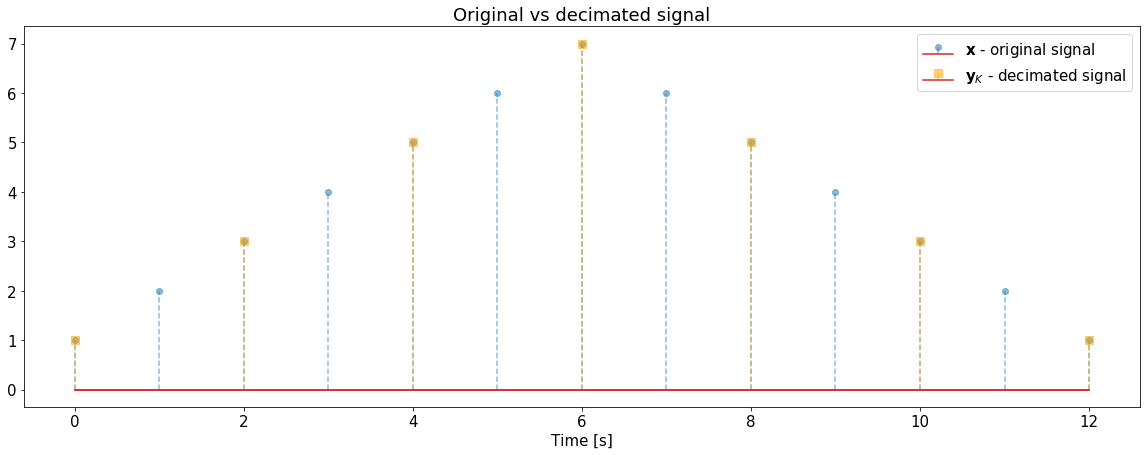

In [64]:
K = 2

x = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
t = np.arange(len(x))

y_d, t_d = decimate(x, K, t)

plt.rc('font', size=15)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$\mathbf{x}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_d, y_d, use_line_collection=True, label='$\mathbf{y}_K$ - decimated signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Original vs decimated signal')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

# Expansion

Contrary to the above operation, we also might need to increase the signal sampling frequency $f_s$. We introduce the additional samples to the signal by:

$$\large
    \mathbf{y}_L(n)=
        \begin{cases}
            \mathbf{x}(n/L), & \text{n=0, $\pm$ L, $\pm$ 2L, ...}\\
            0 & \text{otherwise}
        \end{cases} 
$$
    
Thus the sampling frequency of the expanded signal $\mathbf{y}_L$ is equal to $f_{s_L} = L * f_s$.

## Task

Complete the function below. It should perform the expansion operation on a signal `x`, sampled at timestamps `t`. Besides of implementing the above formula, it should also bo able to return new timestamps `t_L`, at which the decimated signal `y_L` is sampled.

In [65]:
def expand(x, L, t=None):
    """
    This function expands a given signal L-times. It also returns new timestamps if they were given.
    
    Parameters:
        x - Vector to expand.
        L - Expansion factor. It should be an integer.
    
    Returns:
        y_L - Expanded signal.
        t_L - New timestamps.
    """
    
    "Your code goes below here."
    
    y_L = np.zeros(L * len(x))
    y_L[::L] = x
    if t is None:
        return y_L
    else:
        t_L = np.linspace(min(t), max(t) + (t[1] - t[0])/L *(L - 1), L * len(t))
    return y_L, t_L

Check if your function works in the next cell. Try different values of $L$. (Keep in mind that the plots will overlap.)

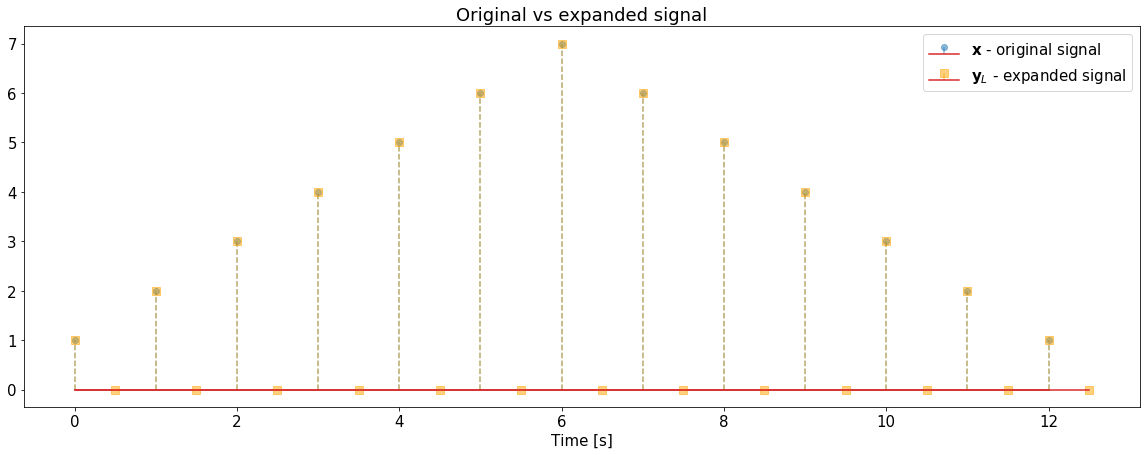

In [66]:
L = 2

y_L, t_L = expand(x, L, t)


plt.rc('font', size=15)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$\mathbf{x}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_L, y_L, use_line_collection=True, label='$\mathbf{y}_L$ - expanded signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Original vs expanded signal')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

In the next cell, check what happens if we perform both operations - first expand and then decimate a signal. Try different values of $K$ and $L$. Can we get a perfectly reconstructed signal? Why / why not?

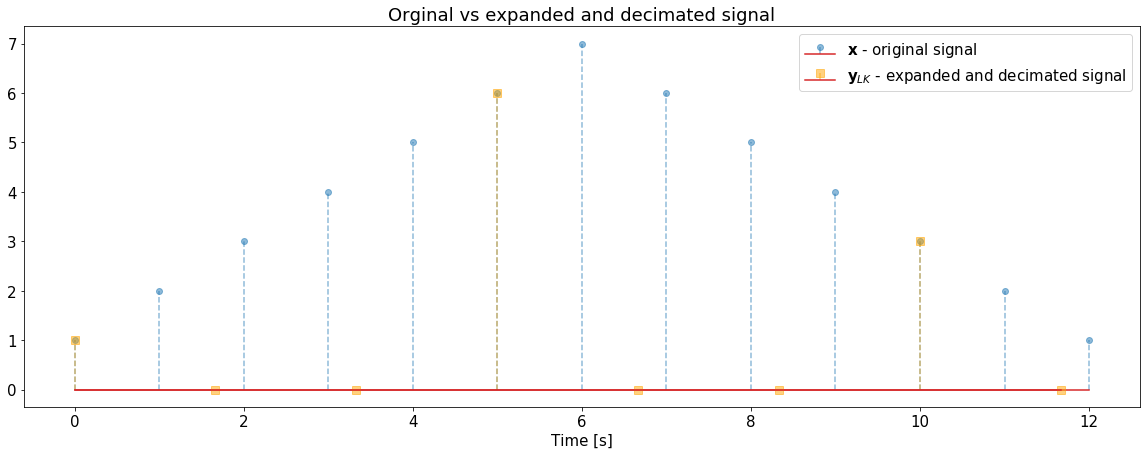

In [67]:
L = 3
K = 5

y_L, t_e = expand(x, L, t)
y_K, t_d = decimate(y_L, K, t_e)


plt.rc('font', size=15)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$\mathbf{x}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_d, y_K, use_line_collection=True, label='$\mathbf{y}_{LK}$ - expanded and decimated signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Orginal vs expanded and decimated signal')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

Now check what happens if we do the operations in oposite order - first decimate then expand a signal. Try different $K$ and $L$ values in the next cell. Can we get a perfectly reconstructed signal? Why / why not?

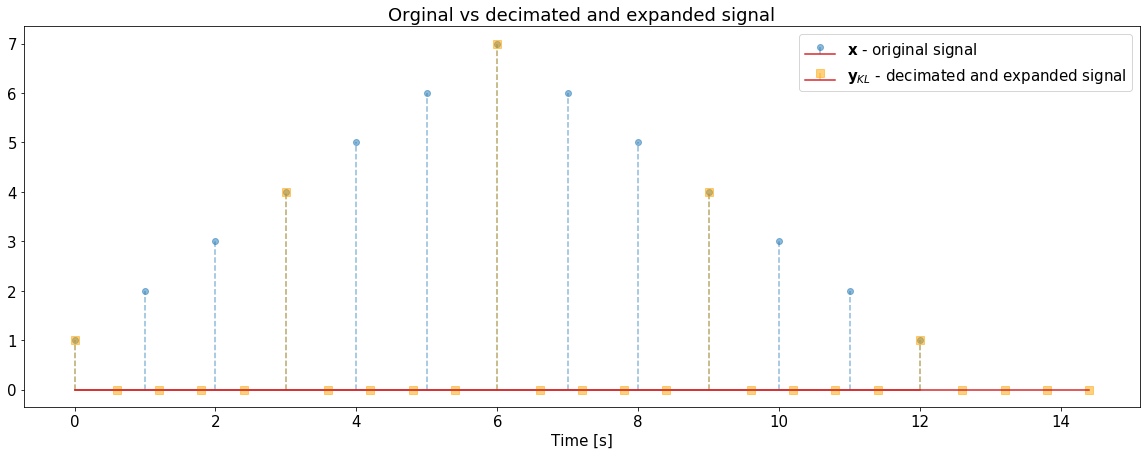

In [68]:
K = 3
L = 5

y_K, t_K = decimate(x, K, t)
y_L, t_L = expand(y_K, L, t_K)


plt.rc('font', size=15)

plt.figure(figsize=(20, 7))

markers, stemlines, baseline = plt.stem(t, x, use_line_collection=True, label='$\mathbf{x}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)

markers, stemlines, baseline = plt.stem(t_L, y_L, use_line_collection=True, label='$\mathbf{y}_{KL}$ - decimated and expanded signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)

plt.title('Orginal vs decimated and expanded signal')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

What is the proper order of performing the operations? Is it 

<center>
    expansion -> decimation
    <br>
    or
    <br>
    decimation -> expansion?
</center>

# Influence on spectrum

The signal spectrum after decimation and expansion is given by the formulas below.

$$\large
    \mathbf{Y}_K \left(
            e^{j \Omega} 
        \right)
    =
    \frac{1}{K} 
    \sum_{k=0}^{K-1} 
    \mathbf{X} \left(
            e^{j \left(
                     \Omega - 2 \Pi k
               \right)/K}                
        \right)
$$

$$\large
    \mathbf{Y}_L \left(
            e^{j \Omega} 
        \right)
    =
    \mathbf{X} \left(
            e^{j \Omega L}                
      \right)
$$

$$\large \Omega = 2 \Pi \frac{f}{f_s}$$

Let's see what are the implications of the above equations. First, we will see what happens to the signal spectrum after the decimation operation. For that we define a new signal $\mathbf{x}$ with arbitrary spectral shape. We can do it through the inverse FFT of it's spectrum $\mathbf{X}$. To better observe the results the symetric parts of the spectrum are additionally presented.

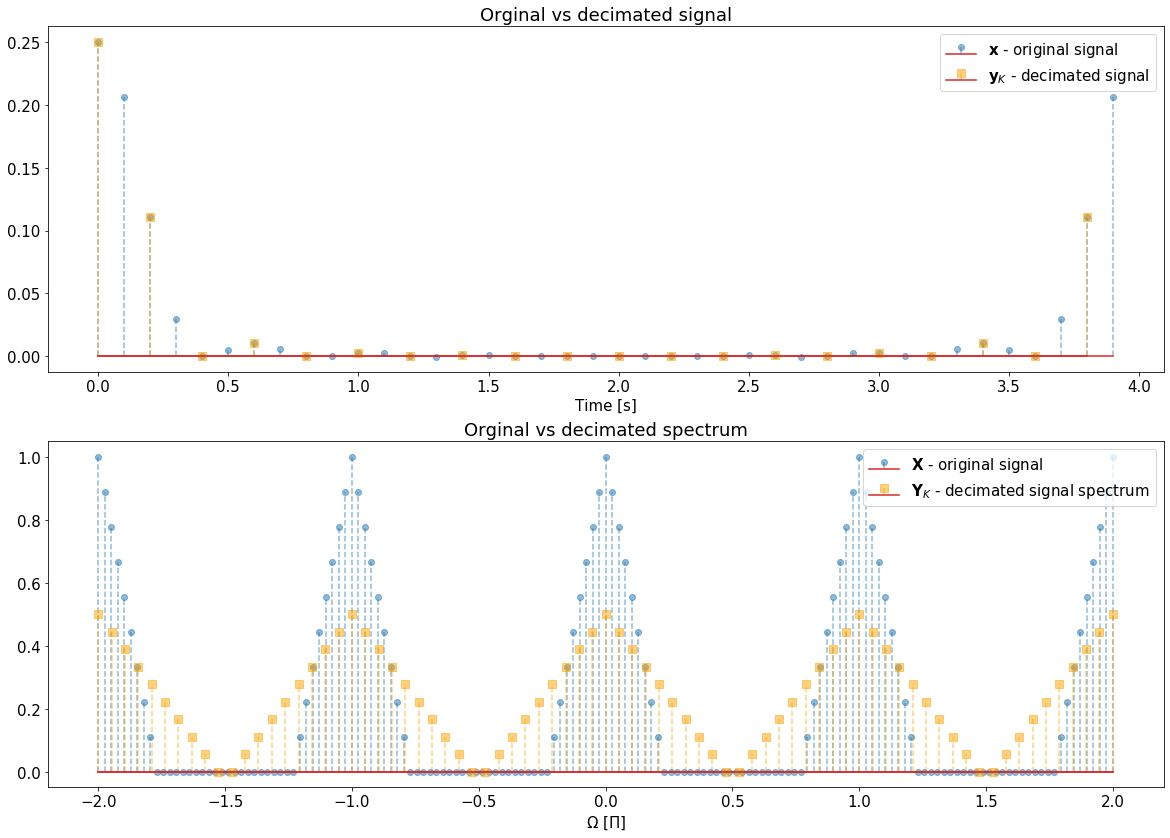

In [69]:
K = 2

X = np.concatenate((np.linspace(1, 0, 10), np.zeros(10)))
X = np.concatenate((X, X[::-1]))

x = np.fft.ifft(X)
t = np.arange(len(x)) * 0.1

y_K, t_K = decimate(x, K, t)

Y_K = np.fft.fft(y_K)

# This is done to plot the symetric parts
X_rep = np.concatenate((X[::-1], X[1:]))
X_rep = np.concatenate((X_rep[::-1], X_rep[1:]))
omega_X_rep = np.linspace(-2, 2, len(X_rep))

Y_K_rep = np.concatenate((Y_K[::-1], Y_K[1:]))
Y_K_rep = np.concatenate((Y_K_rep[::-1], Y_K_rep[1:]))
omega_Y_K_rep = np.linspace(-2, 2, len(Y_K_rep))


fig, ax = plt.subplots(2, 1, figsize=(20, 14))

markers, stemlines, baseline = ax[0].stem(t, x.real, use_line_collection=True, label='$\mathbf{x}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[0].stem(t_K, y_K.real, use_line_collection=True, label='$\mathbf{y}_K$ - decimated signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[0].set_title('Orginal vs decimated signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(omega_X_rep, X_rep, use_line_collection=True, label='$\mathbf{X}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[1].stem(omega_Y_K_rep, Y_K_rep.real, use_line_collection=True, label='$\mathbf{Y}_K$ - decimated signal spectrum')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[1].set_title('Orginal vs decimated spectrum')
ax[1].set_xlabel('$\Omega$ [$\Pi$]')
ax[1].legend()

plt.rc('font', size=15)
plt.show()

Try different values of $K$. How does decimation affect the spectrum?

In the next cell, see what happens to the same signal $\mathbf{x}$ after expansion.

/home/teacher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


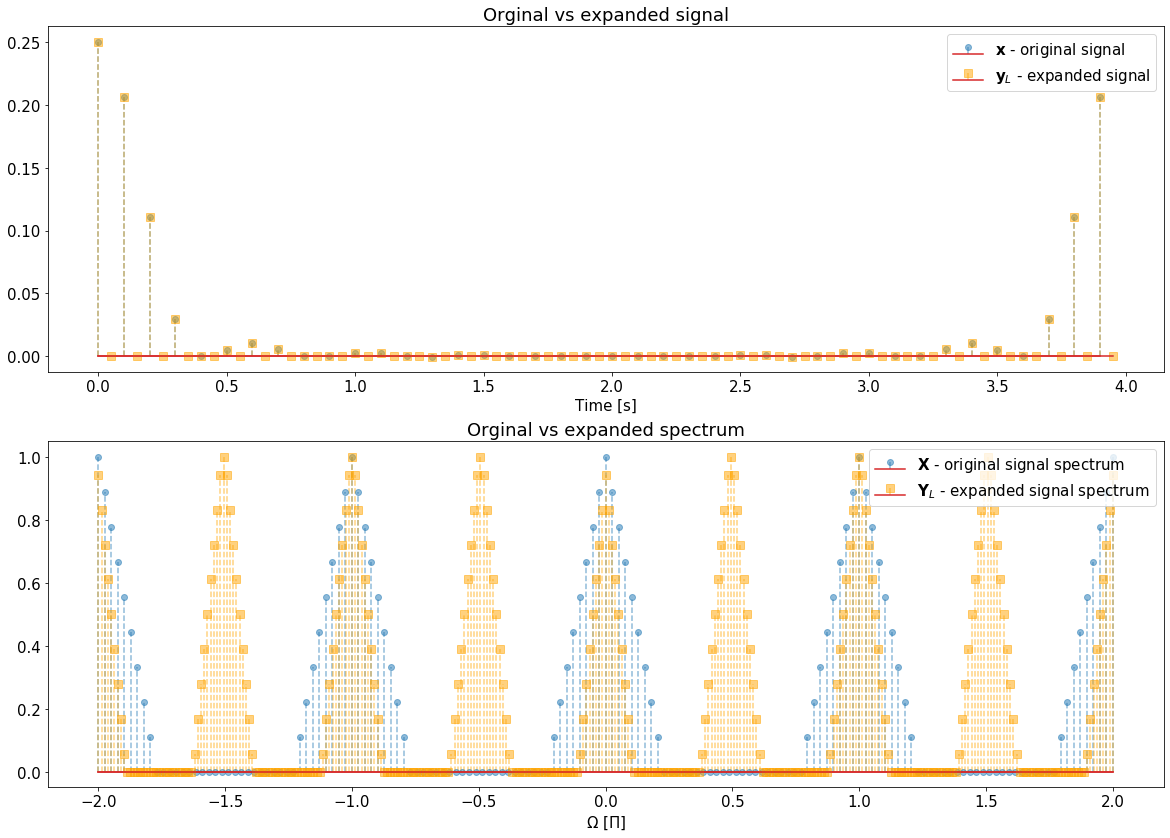

In [70]:
L = 2

y_L, t_L = expand(x, L, t)

Y_L = np.fft.fft(y_L)

# This is done to plot the symetric parts
Y_L_rep = np.concatenate((Y_L[::-1], Y_L[1:]))
Y_L_rep = np.concatenate((Y_L_rep[::-1], Y_L_rep[1:]))
omega_Y_L_rep = np.linspace(-2, 2, len(Y_L_rep))


fig, ax = plt.subplots(2, 1, figsize=(20, 14))

markers, stemlines, baseline = ax[0].stem(t, x.real, use_line_collection=True, label='$\mathbf{x}$ - original signal')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[0].stem(t_L, y_L.real, use_line_collection=True, label='$\mathbf{y}_L$ - expanded signal')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[0].set_title('Orginal vs expanded signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(omega_X_rep, X_rep, use_line_collection=True, label='$\mathbf{X}$ - original signal spectrum')
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
markers, stemlines, baseline = ax[1].stem(omega_Y_L_rep, Y_L_rep.real, use_line_collection=True, label='$\mathbf{Y}_L$ - expanded signal spectrum')
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[1].set_title('Orginal vs expanded spectrum')
ax[1].set_xlabel('$\Omega$ [$\Pi$]')
ax[1].legend()

plt.rc('font', size=15)
plt.show()

Try different values of $L$. How does expansion affect the spectrum?

For better understanding, let's look at another example of what happens with the signal spectrum after decimation and expansion. For that we create a different signal $\mathbf{x}$ with 'simpler' spectrum $\mathbf{X}$. It is sampled at $f_s$ equal to 100 Hz and contains two sinusoidal components with frequencies 20 and 40 Hz. In the cell below are the spectra of original, downsampled and expanded signal. Try different values of $K$ and $L$ and observe the peaks in spectra. Focus on their position, number and amplitude.

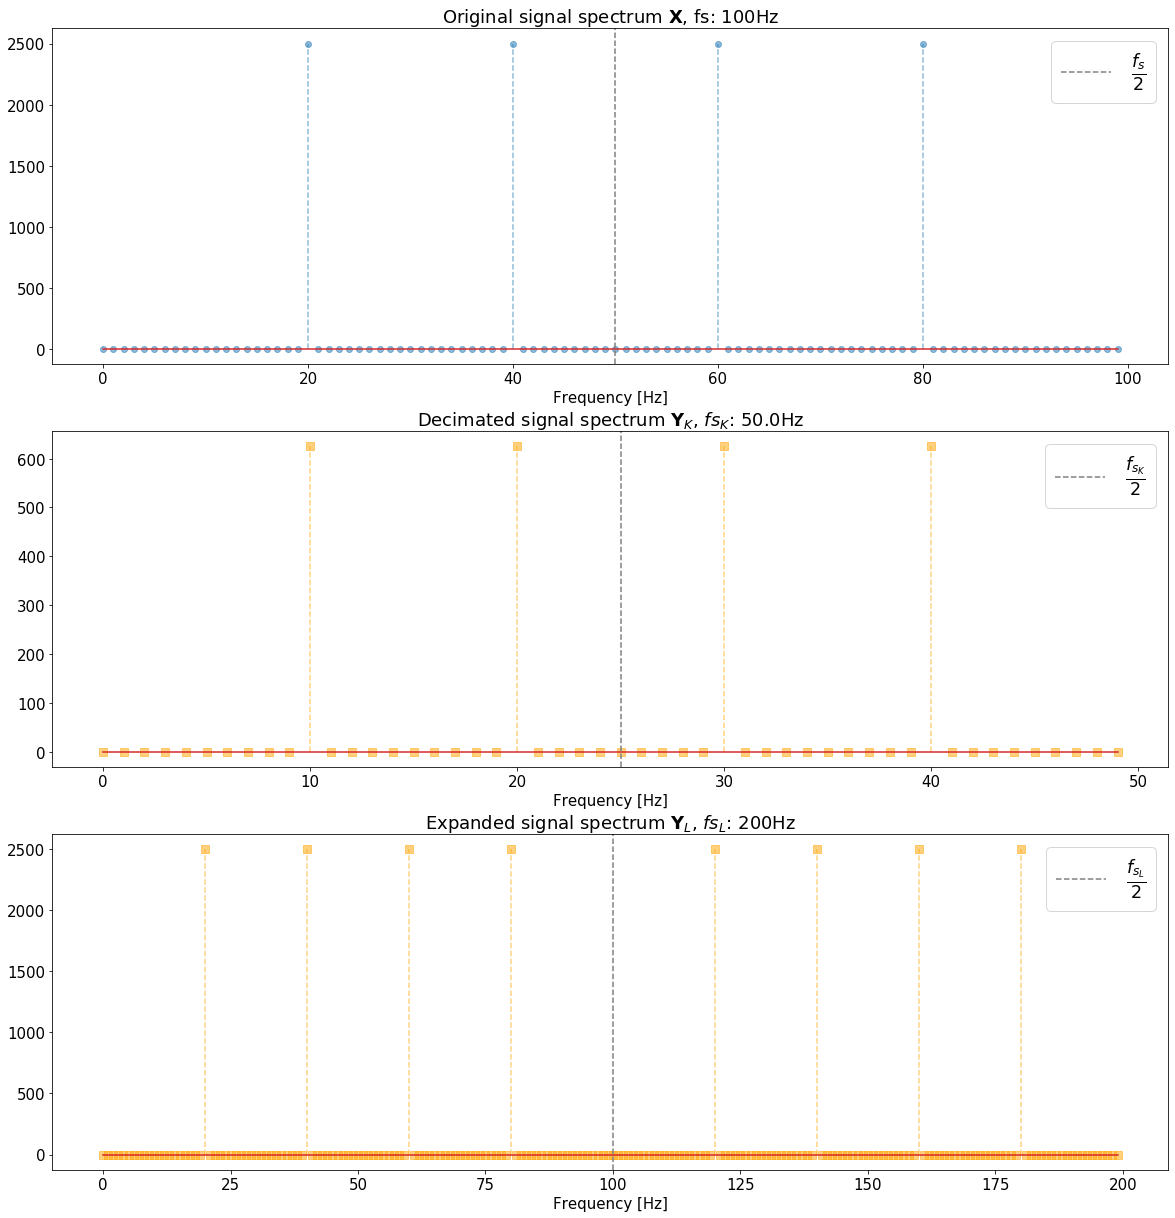

In [71]:
K = 2
L = 2

fs = 100
f1 = 20
f2 = 40
t = np.arange(fs) * 1/fs
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
X = np.fft.fft(x)
f = np.arange(0, fs, fs/len(x))

y_K = decimate(x, K)
fs_K = fs/K
Y_K = np.fft.fft(y_K)
f_K = np.arange(0, fs_K, fs_K/(len(y_K)))

y_L = expand(x, L)
fs_L = fs*L
Y_L = np.fft.fft(y_L)
f_L = np.arange(0, fs_L, fs_L/(len(y_L)))


fig, ax = plt.subplots(3, 1, figsize=(20, 21))

markers, stemlines, baseline = ax[0].stem(f, np.abs(X)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
ax[0].axvline(fs/2, linestyle="--", color='grey', label=r'$\frac{f_s}{2}$')
ax[0].set_title('Original signal spectrum $\mathbf{X}$, fs: ' + str(fs) + 'Hz')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend(fontsize=25)

markers, stemlines, baseline = ax[1].stem(f_K, np.abs(Y_K)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[1].axvline(fs_K/2, linestyle="--", color='grey', label=r'$\frac{f_{s_K}}{2}$')
ax[1].set_title('Decimated signal spectrum $\mathbf{Y}_K$, $fs_K$: ' + str(fs_K) + 'Hz')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(fontsize=25)

markers, stemlines, baseline = ax[2].stem(f_L, np.abs(Y_L)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[2].axvline(fs_L/2, linestyle="--", color='grey', label=r'$\frac{f_{s_L}}{2}$')
ax[2].set_title('Expanded signal spectrum $\mathbf{Y}_L$, $fs_L$: ' + str(fs_L) + 'Hz')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend(fontsize=25)

plt.rc('font', size=15)
plt.show()

Why do we sometimes get additional components in the spectrum? When does it happen?

# Polyphase resampling

Obviously, for a successful resampling operation an unchanged structure of the spectrum is desired. To get rid of the unwanted influence on spectrum the application of a low-pass filter is needed. The diagrams below show the <b>resampling</b> operation, namely <b>downsampling</b> and <b>upsampling</b>. 

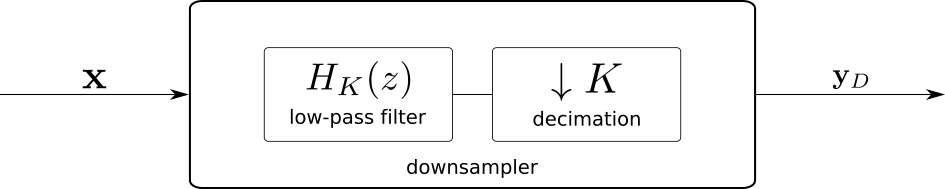

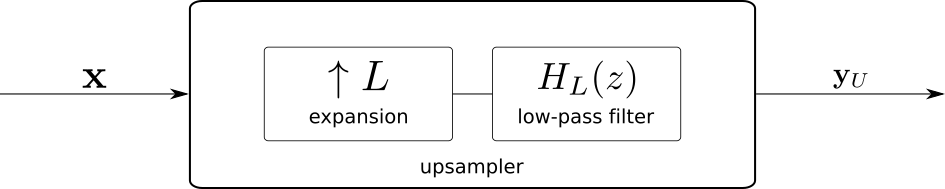

Based on the diagrams and knowledge from previous tasks and questions, think what is the proper way to resample a signal. How would you change a signal sampling frequency $f_s$ from 100 Hz so that the sampling frequency $f_{s_R}$ of the resampled signal $\mathbf{y}_R$ is equal to 175 Hz? Do we need to perform every single operation from the above diagrams? What would be the order of operations and overall optimal solution?

## Task

Complete the function below. It should perform the resampling operation on a signal `x`, sampled at timestamps `t`. 
It should also bo able to return new timestamps `t_r`, at which the resampled signal `y_R` is sampled. The sampling frequency of the resampled signal $\mathbf{y}_R$ should be equal to $f_{s_R} = L *  \large \frac{f_s}{K}$.  Multiplication by $L$ or $K$ should be included to compensate for the amplitude change. 
Apply `np.convolve` to filter the signal, **use only even number of filter coeficients** and then account for the phase offset by removing the first N/2 samples, also remove the last excessive N/2 samples.

In [72]:
def resample_poly(x, L, K, N, t=None):
    """
    This function resamples a given signal.
    The resulting sampling frequency depends on L/K.
    It also returns new timestamps if they were given.
    
    Parameters
        x - Vector to resample.
        L - Expansion factor. It should be an integer.
        K - Decimation factor. It should be an integer.
        N - Number of filter coefficients. (must be even!)
        t - Timestamps.
    
    Returns:
        y_R - Resampled signal.
        t_R - New timestamps.
    """

    "Your code goes below here."
    
    y_L = expand(x, L)  
    h = scipy.signal.firwin(N, 1/np.maximum(K, L), pass_zero='lowpass') 
    y_f = np.convolve(y_L, h) 
    y_f *= np.maximum(K, L)  
    y_f = y_f[(N//2): -(N//2)]  
    y_R = decimate(y_f, K)  
    
    
    if t is None:
        return y_R   
    t_L = expand(x, L, t)[1]  
    t_R = decimate(y_f, K, t_L)[1]  
    
    return y_R, t_R

Check if your function works in the next cell. Resample the previously used signal $\mathbf{x}$ sampled at 100 Hz to 175Hz. Try different values of $K$ and $L$.

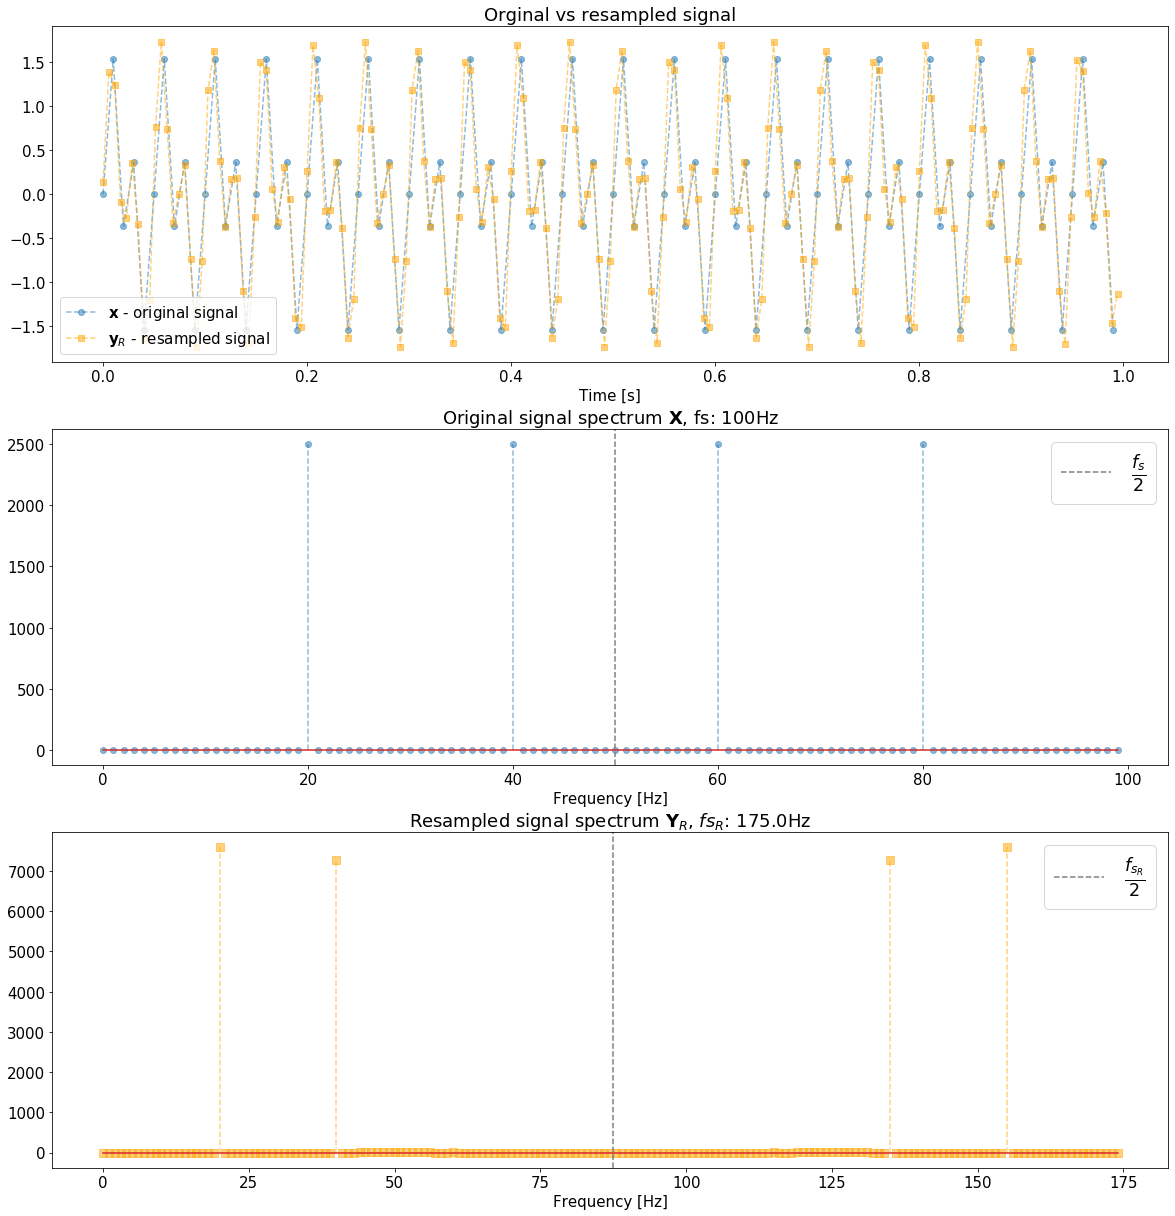

In [73]:
L = 7
K = 4
N = 100

y_R, t_R = resample_poly(x, L, K, N, t)
fs_R = fs*L/K
Y_R = np.fft.fft(y_R)
f_R = np.arange(0, fs_R, fs_R/(len(y_R)))


fig, ax = plt.subplots(3, 1, figsize=(20, 21))

ax[0].plot(t, x.real, 'o--', alpha=0.5, label='$\mathbf{x}$ - original signal')
ax[0].plot(t_R, y_R.real, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs resampled signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(f, np.abs(X)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
ax[1].axvline(fs/2, linestyle="--", color='grey', label=r'$\frac{f_s}{2}$')
ax[1].set_title('Original signal spectrum $\mathbf{X}$, fs: ' + str(fs) + 'Hz')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(fontsize=25)

markers, stemlines, baseline = ax[2].stem(f_R, np.abs(Y_R)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[2].axvline(fs_R/2, linestyle="--", color='grey', label=r'$\frac{f_{s_R}}{2}$')
ax[2].set_title('Resampled signal spectrum $\mathbf{Y}_R$, $fs_R$: ' + str(fs_R) + 'Hz')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend(fontsize=25)

plt.rc('font', size=15)
plt.show()

# Resampling using FFT

Resampling can also bo performed through the FFT interpolation. It is done according to the following steps:

- Fast Fourier Transform
- Zero-padding of the highest frequencies / Removal of the coeffictints corresponding to the highest frequencies
- Inverse Fast Fourier Transform

The important thing to remember is that since we use the FFT, there is an underlying assumption that the signal is <b>periodic</b>.

## Task

Complete the function below. It should perform the resampling operation on a signal `x`, sampled at timestamps `t`. It should also bo able to return new timestamps `t_R`, at which the resampled signal `y_R` is sampled. The sampling frequency of the resampled signal $\mathbf{y}_R$ should be equal to $f_{s_R} = N_R * \large \frac{f_s}{N}$, where $N$ and $N_R$ are the number of samples of a signal, before and after the resampling operation. Multiplication by $\large \frac{N}{N_R}$ should be included to compensate for the amplitude change. Completing the task can be easily achieved with `np.fft.rfft` and `np.fft.irfft`. Other packages can also be used, but it is very important to asure proper symmetry of the spectrum.

In [74]:
def resample_fft(x, N_R, t=None):
    """
    This function resamples a given signal using the FFT interpolation
    It also returns new timestamps if they were given.
    
    Parameters
        x - Vector to resample.
        N_R - Number of samples in the resampled signal.
        t - Timestamps.
    
    Returns:
        y_R - Resampled signal.
        t_R - New timestamps.
    """

    "Your code goes below here."

    Xf = np.fft.rfft(x)
    N = x.size
    
    y_R = np.fft.irfft(Xf,N_R)* N_R/N
    
    if t is None:
        return y_R
    else:
        t_R = np.linspace(0,1,N_R)
        
    return y_R, t_R

Check if your function works in the next cell. Resample the previous signal $\mathbf{x}$ sampled at 100 Hz to 175Hz. Try different values of $N_R$.

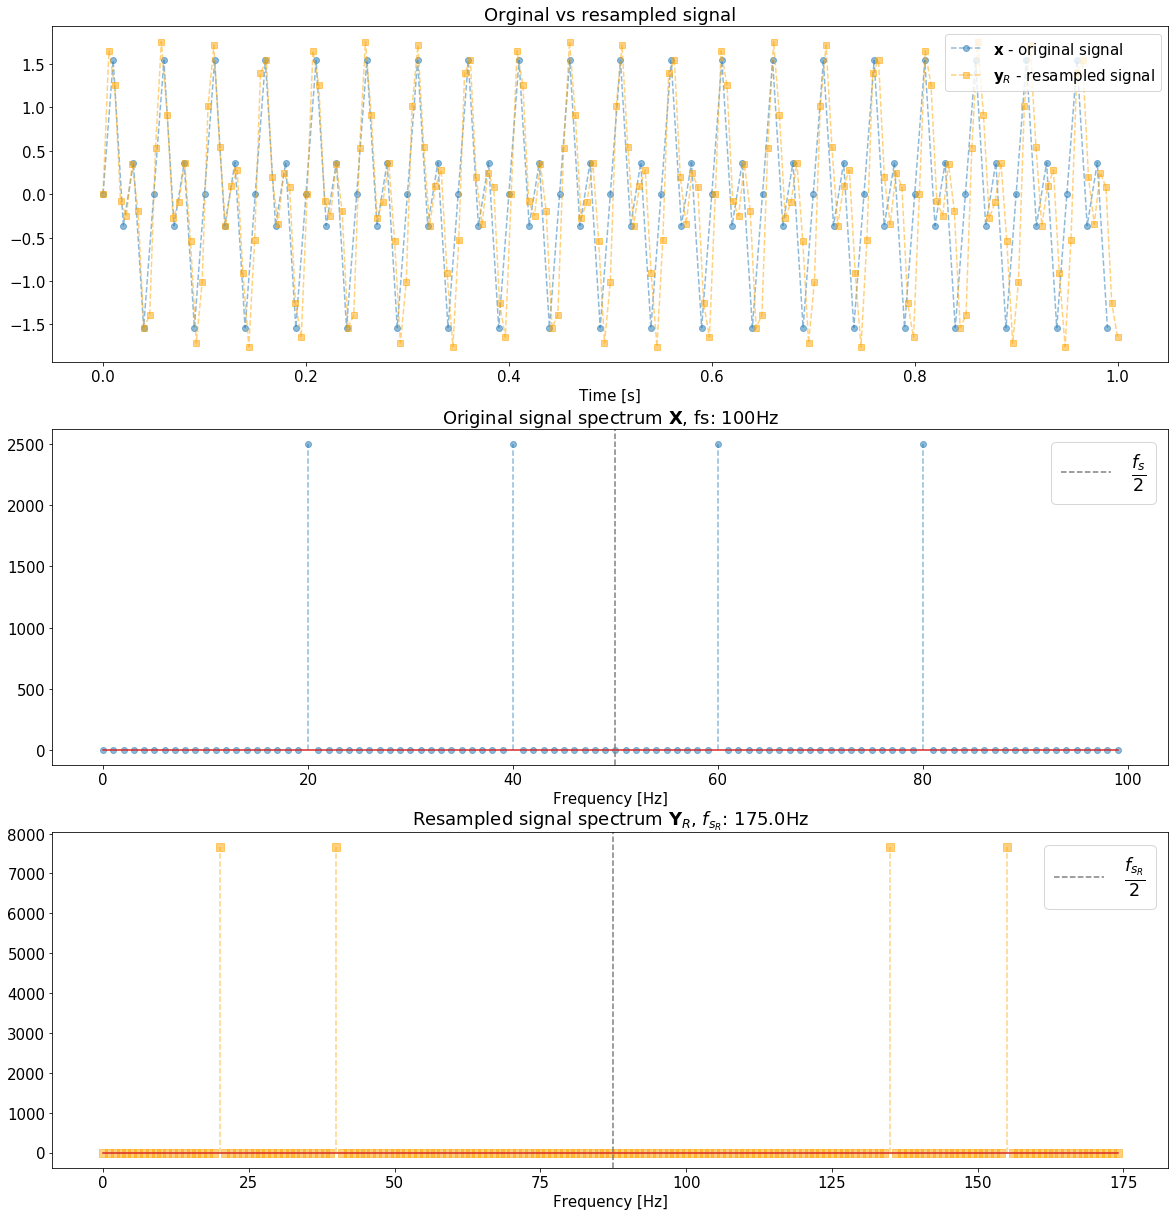

In [75]:
N_R = int(len(x) / fs * 175)

y_R, t_R = resample_fft(x, N_R, t)

fs_R = fs*N_R/len(x)
Y_R = np.fft.fft(y_R)
f_R = np.arange(0, fs_R, fs_R/(len(y_R)))


fig, ax = plt.subplots(3, 1, figsize=(20, 21))

ax[0].plot(t, x.real, 'o--', alpha=0.5, label='$\mathbf{x}$ - original signal')
ax[0].plot(t_R, y_R.real, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs resampled signal')
ax[0].set_xlabel('Time [s]')
ax[0].legend()

markers, stemlines, baseline = ax[1].stem(f, np.abs(X)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", alpha=0.5)
plt.setp(markers, alpha=0.5)
ax[1].axvline(fs/2, linestyle="--", color='grey', label=r'$\frac{f_s}{2}$')
ax[1].set_title('Original signal spectrum $\mathbf{X}$, fs: ' + str(fs) + 'Hz')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(fontsize=25)

markers, stemlines, baseline = ax[2].stem(f_R, np.abs(Y_R)**2, use_line_collection=True)
plt.setp(stemlines, linestyle="--", color="orange", alpha=0.5)
plt.setp(markers, marker='s', markersize=8, color="orange", alpha=0.5)
ax[2].axvline(fs_R/2, linestyle="--", color='grey', label=r'$\frac{f_{s_R}}{2}$')
ax[2].set_title('Resampled signal spectrum $\mathbf{Y}_R$, $f_{s_R}$: ' + str(fs_R) + 'Hz')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend(fontsize=25)

plt.rc('font', size=15)
plt.show()

# Polyphase vs FFT resampling

## Task

Copy `rpobs` and `bl_signal` functions from the notebook about sampling and paste them below. Using those functions generate two one-second long random band-limitted signals $\mathbf{x}$ and $\mathbf{x}_R$, meaning a signal sampled at 100 Hz and it's version ideally resampled to 105 Hz, respecitvely. Both signals should be created using the same set of parameters, for example `C=100, amp=1, f_s=0, f_e=40`. Place the signals in variables called `x` and `x_R`, timestamps in `t` and `t_R` and sampling fequencies in `fs` and `fs_R`.

In [76]:
"Your code goes below here."

def rpobs(C=100, amp=1, f_s=0, f_e=1):
    
    F = np.random.uniform(low=f_s, high=f_e, size=(C,))
    A = np.random.uniform(low=0.0, high=amp, size=(C,))
    P = np.random.uniform(low=0.0, high=2*np.pi, size=(C,))
    
    return F, A, P

def bl_signal(t, signal_parmas):
    
    F, A, P = signal_parmas
    y = np.zeros(len(t))
    for k in range(len(F)):
        y = y + (A[k] * np.sin(2 * np.pi * F[k] * t + P[k]))
    return y    

In [77]:
"Your code goes below here."

fs_R = 105
fs = 100

t_R = np.linspace(0,1,fs_R)
t = np.linspace(0,1,fs)

SP = rpobs()
signal = lambda t: bl_signal(t,SP)

x_R = signal(t_R)
x = signal(t)

In [78]:
L = 21
K = 20
N = 100

y_R_poly, t_R_poly = resample_poly(x, L, K, N, t)
Y_R_poly = np.fft.fft(y_R_poly)

N_R = int(len(x) / fs * fs_R)

y_R_fft, t_R_fft = resample_fft(x, N_R, t)
Y_R_fft = np.fft.fft(y_R_fft)
fs_R_poly = fs*N_R/len(x)
f_R_poly = np.arange(0, fs_R_poly, fs_R_poly/(len(y_R_poly)))

RMSE_poly = round(np.mean((x_R-y_R_poly)**2)**(1/2), 3)
RMSE_fft = round(np.mean((x_R-y_R_fft)**2)**(1/2), 3)

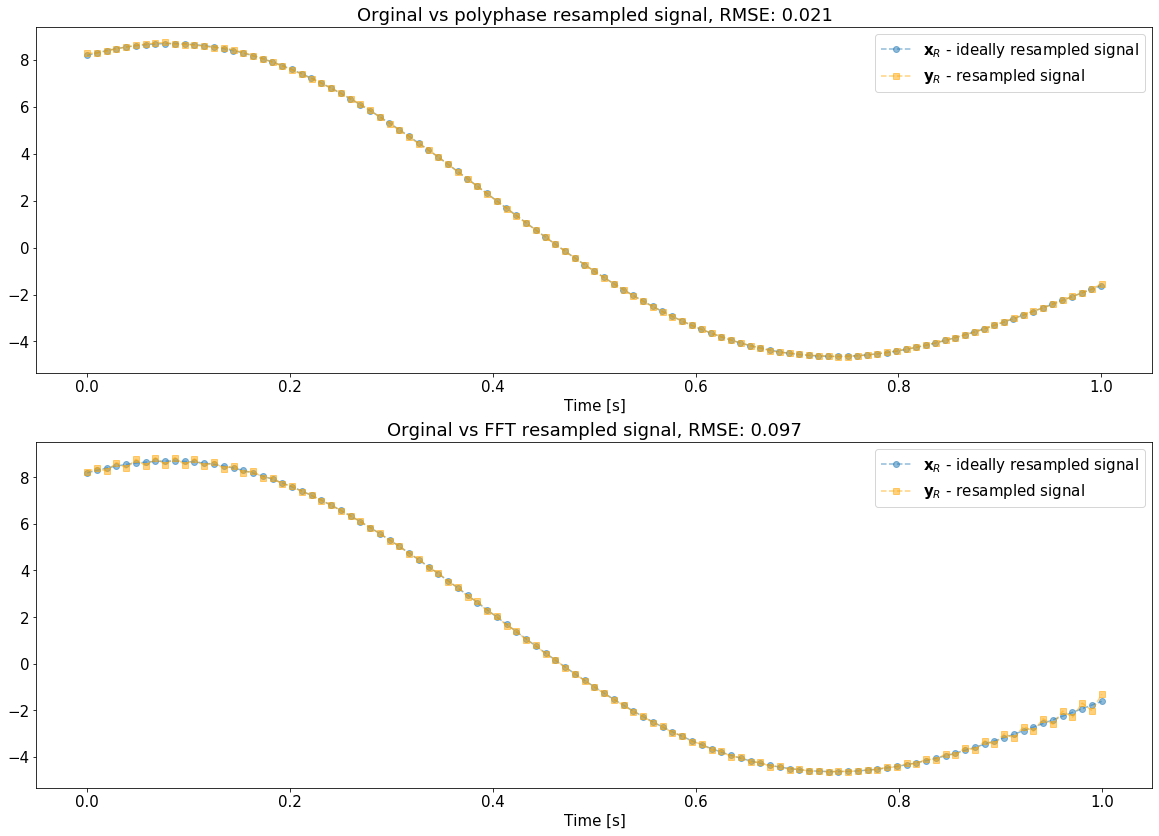

In [79]:
fig, ax = plt.subplots(2, 1, figsize=(20, 14))

ax[0].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[0].plot(t_R_poly, y_R_poly, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs polyphase resampled signal, RMSE: ' + str(RMSE_poly))
ax[0].set_xlabel('Time [s]')
ax[0].legend()

ax[1].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[1].plot(t_R_fft, y_R_fft, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[1].set_title('Orginal vs FFT resampled signal, RMSE: ' + str(RMSE_fft))
ax[1].set_xlabel('Time [s]')
ax[1].legend()

fig.show()

## Task

Create 10Hz sine signals $x$ and $x_R$ sampled at 100 and 105 Hz, respectively. **Make sure they are periodic.** Place the signals in variables called `x` and `x_R`, timestamps in `t` and `t_R` and sampling fequencies in `fs` and `fs_R`.

In [80]:
"Your code goes below here."

f = 10  

fs = 100 
t = np.arange(fs) * 1/fs
x = np.sin(2 * np.pi * f * t)


fs_R = 105
t_R = np.arange(fs_R) * 1/fs_R
x_R = np.sin(2 * np.pi * f * t_R)

In [81]:
L = 21
K = 20
N = 100

y_R_poly, t_R_poly = resample_poly(x, L, K, N, t)
Y_R_poly = np.fft.fft(y_R_poly)

N_R = round(len(x) / fs * fs_R)
y_R_fft, t_R_fft = resample_fft(x, N_R, t)
Y_R_fft = np.fft.fft(y_R_fft)
fs_R_poly = fs*N_R/len(x)
f_R_poly = np.arange(0, fs_R_poly, fs_R_poly/(len(y_R_poly)))

RMSE_poly = round(np.mean((x_R-y_R_poly)**2)**(1/2), 3)
RMSE_fft = round(np.mean((x_R-y_R_fft)**2)**(1/2), 3)

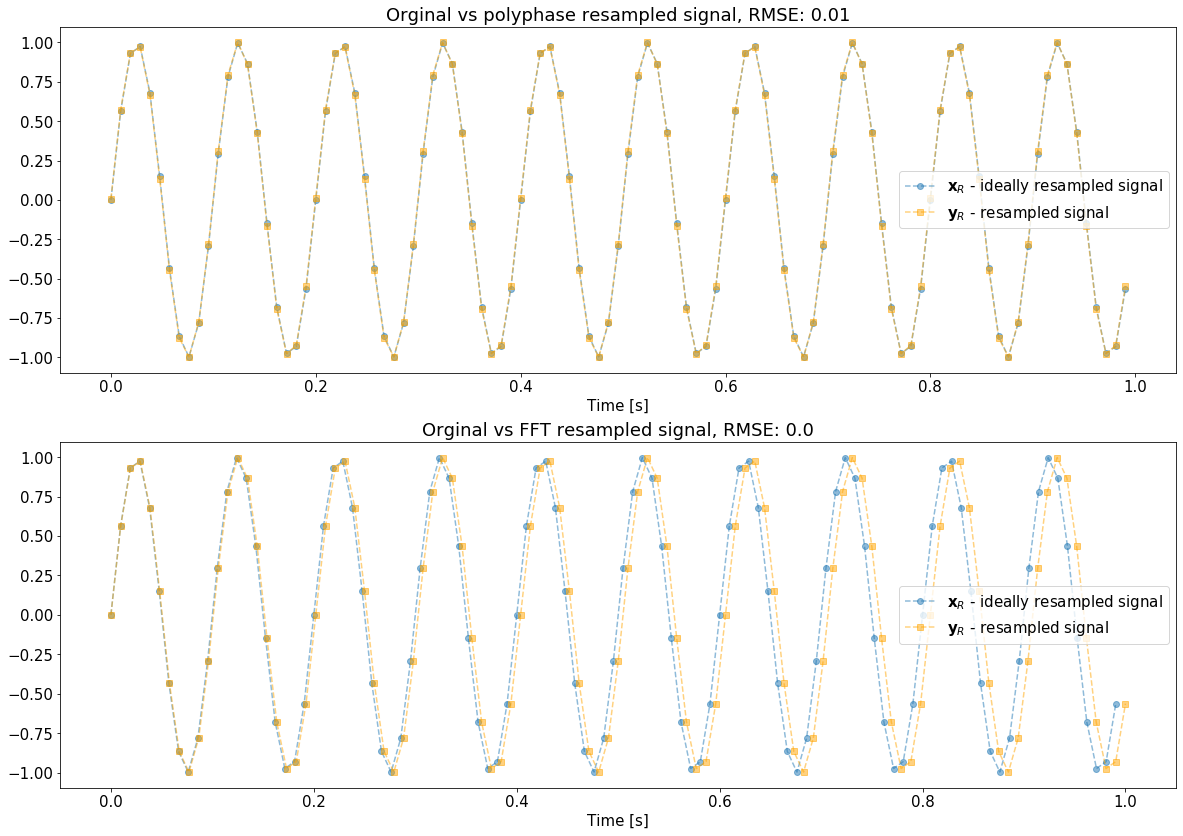

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(20, 14))

ax[0].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[0].plot(t_R_poly, y_R_poly, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[0].set_title('Orginal vs polyphase resampled signal, RMSE: ' + str(RMSE_poly))
ax[0].set_xlabel('Time [s]')
ax[0].legend()

ax[1].plot(t_R, x_R, 'o--', alpha=0.5, label='$\mathbf{x}_R$ - ideally resampled signal')
ax[1].plot(t_R_fft, y_R_fft, 's--', color="orange", alpha=0.5, label='$\mathbf{y}_R$ - resampled signal')
ax[1].set_title('Orginal vs FFT resampled signal, RMSE: ' + str(RMSE_fft))
ax[1].set_xlabel('Time [s]')
ax[1].legend()

fig.show()

As you can see, when the resampled signal is periodic the error for the FFT interpolation is very close to 0.